# Image Compression in Python using K-Means Clustering

In [1]:
#Importing the required libraries.
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

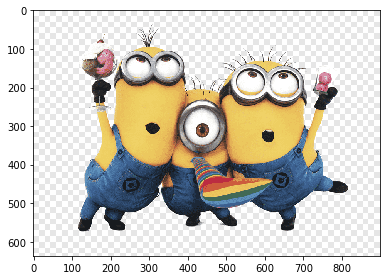

In [2]:
#Loading the image.
image = io.imread('minions.png')
io.imshow(image)
io.show()

In [3]:
#Dimensions of the original image
nrows = image.shape[0]
ncols = image.shape[1]
print("Number of rows:",nrows,"\nNumber of columns:",ncols)

Number of rows: 637 
Number of columns: 900


In [4]:
#Flattening the image
image = image.reshape(nrows*ncols, 4)

C:\Users\Ashirwad\.conda\envs\Python 36\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (46) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  """


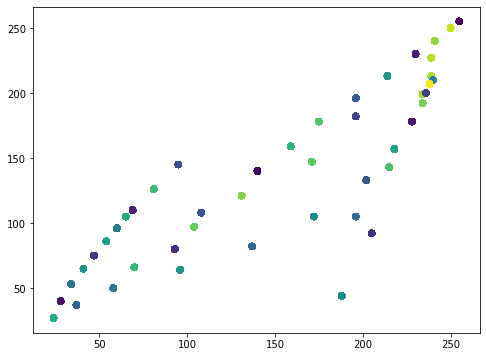

Number of clusters: 64


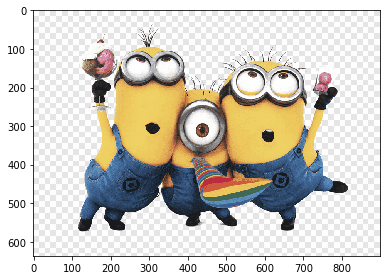

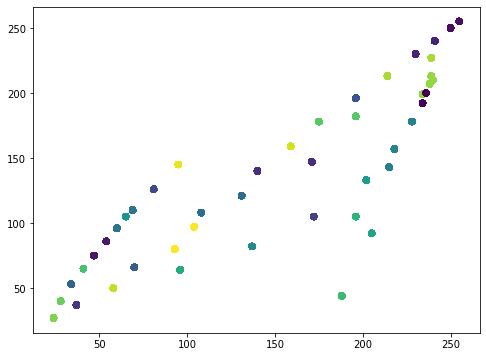

Number of clusters: 32


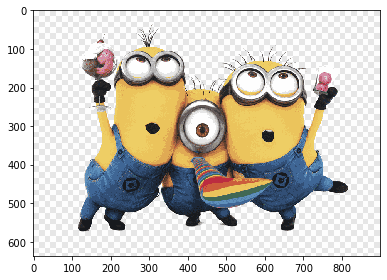

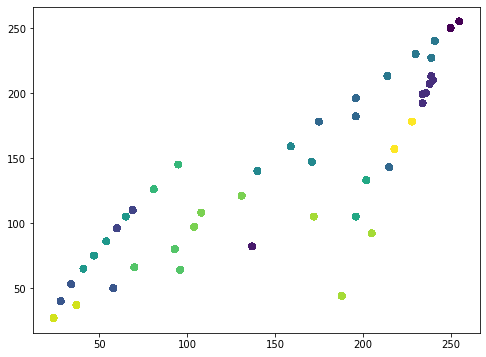

Number of clusters: 16


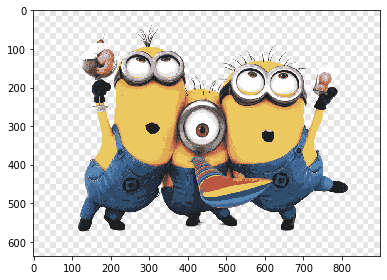

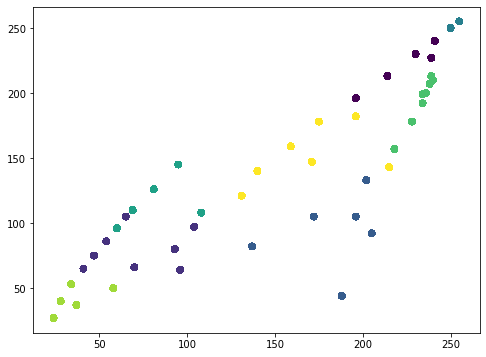

Number of clusters: 8


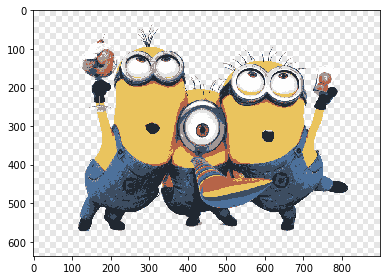

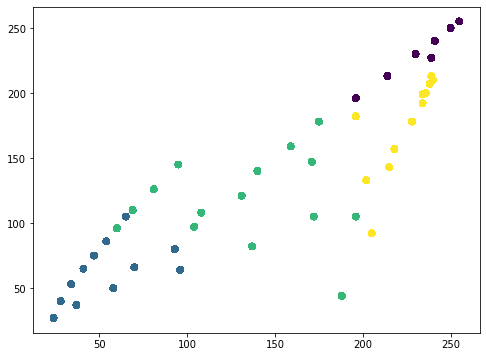

Number of clusters: 4


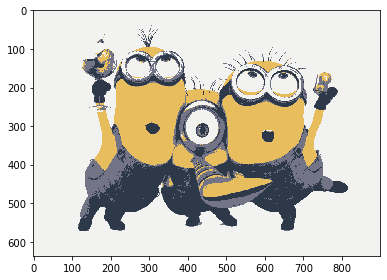

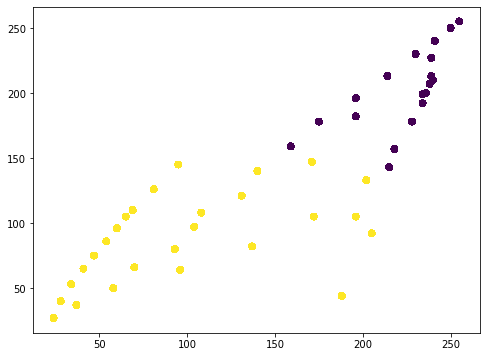

Number of clusters: 2


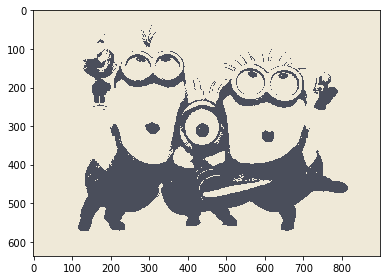

In [5]:
#Implementing K-means clustering to form 'K' clusters
for i in range(6,0,-1):
    i=pow(2,i)
    model = KMeans(n_clusters=i)
    model.fit(image)
    
    # Visualizing the image colors as scatter plot.
    plt.figure(figsize=(8, 6))
    plt.scatter(image[:,0], image[:,1], c=model.labels_.astype(float))
    plt.show()
    
    #Replacing each pixel value with its nearest centroid.
    compressed_image = model.cluster_centers_[model.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
    
    #Reshaping the image back to its original dimension.
    compressed_image = compressed_image.reshape(nrows, ncols, 4)
    
    #Save and display output image.
    print("Number of clusters:",i)
    io.imsave('compressed_image.png', compressed_image)
    io.imshow(compressed_image)
    io.show()